In [1]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library warnings.filterwarnings("ignore", category=DeprecationWarning,
import numpy as np
import os
import languageProcess as lp

In [2]:
articles=[]
path='../Baseline/plaindata'
categories=os.listdir(path)
for cat in categories:
    filepath = path+"/"+cat+"/AA/wiki_00"
    if os.path.exists(filepath):               #Save all base articles in an array of arrays
        articles += [lp.languageProcess(filepath).getWords()]

In [3]:
test = [' '.join(block) for block in articles]


In [4]:
vectorizer= TfidfVectorizer()
dtm = vectorizer.fit_transform(test)
pd.DataFrame(dtm.toarray(),index=categories,columns=vectorizer.get_feature_names ()).head(10)

,abandonment,abbas,abbreviation,abduction,abet,ability,abolition,abolitionism,abortion,absence,...,yin,york,yorker,youth,yuan,zebra,zero,zone,zoology,zoom
Culture_20,0.000000,0.0,0.0,0.0,0.0,0.011966,0.0,0.0,0.0,0.0,...,0.000000,0.012115,0.000000,0.011373,0.0,0.000000,0.0,0.000000,0.0,0.0
Nature_20,0.000000,0.0,0.0,0.0,0.0,0.015954,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.006206,0.0,0.017584,0.0,0.0
Concepts_20,0.000000,0.0,0.0,0.0,0.0,0.039677,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
History_20,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
Technology_20,0.000000,0.0,0.0,0.0,0.0,0.009310,0.0,0.0,0.0,0.0,...,0.000000,0.007069,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
Arts_20,0.010029,0.0,0.0,0.0,0.0,0.009208,0.0,0.0,0.0,0.0,...,0.000000,0.005594,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
Entertainment_20,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.013493,0.021172,0.018981,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
Business_20,0.000000,0.0,0.0,0.0,0.0,0.020213,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
Society_20,0.000000,0.0,0.0,0.0,0.0,0.007199,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
Life_20,0.000000,0.0,0.0,0.0,0.0,0.018563,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.026038,0.0,0.0


In [5]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['abandonment',
 'abbas',
 'abbreviation',
 'abduction',
 'abet',
 'ability',
 'abolition',
 'abolitionism',
 'abortion',
 'absence',
 'absinthe',
 'absolute',
 'absorption',
 'abstract',
 'abstraction',
 'abu',
 'abundance',
 'abuse',
 'academic',
 'academy',
 'acceleration',
 'accelerator',
 'accelerometer',
 'accent',
 'acceptance',
 'access',
 'accessibility',
 'accident',
 'accord',
 'account',
 'accountability',
 'accounting',
 'accreditation',
 'accumulation',
 'accuracy',
 'accurate',
 'accusation',
 'achievement',
 'acid',
 'acquisition',
 'acquit',
 'acronym',
 'act',
 'action',
 'activation',
 'activism',
 'activist',
 'activity',
 'actor',
 'acumen',
 'adaptability',
 'adaptation',
 'addition',
 'address',
 'adequacy',
 'adherence',
 'adherent',
 'adhesion',
 'adjective',
 'adjournment',
 'adjudication',
 'administration',
 'administrator',
 'admiralty',
 'admission',
 'adolescent',
 'adoption',
 'adrenaline',
 'adult',
 'advance',
 'advancement',
 'advantage',
 'adventure'

In [6]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm.asfptype())
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [7]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,abandonment,abbas,abbreviation,abduction,abet,ability,abolition,abolitionism,abortion,absence,...,yin,york,yorker,youth,yuan,zebra,zero,zone,zoology,zoom
component_1,0.000991,0.001198,0.020340,0.001597,0.000467,0.021614,0.001806,0.000467,0.004455,0.001256,...,0.004341,0.007751,0.001397,0.007187,0.000277,0.000698,0.003418,0.006361,0.001266,0.002027
component_2,0.003354,0.001171,-0.010293,-0.001037,-0.000292,-0.008465,0.001477,-0.000292,0.006336,-0.000460,...,-0.000370,-0.000557,0.001206,-0.003122,-0.000424,-0.000907,-0.003421,-0.008692,-0.000304,-0.002611


In [8]:
pd.DataFrame(dtm_lsa, index = categories, columns = ["component_1","component_2" ])

,component_1,component_2
Culture_20,0.967180,0.254092
Nature_20,0.886879,-0.462001
Concepts_20,0.967322,-0.253553
History_20,0.746855,0.664987
Technology_20,0.962161,-0.272483
Arts_20,0.593578,0.804777
Entertainment_20,0.945143,0.326656
Business_20,0.858804,-0.512304
Society_20,0.943093,-0.332528
Life_20,0.806977,-0.590583


In [9]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.9671799566697433,
  0.8868793298335563,
  0.9673215589871972,
  0.7468551409839526,
  0.9621605920650368,
  0.5935777555662962,
  0.9451433319762196,
  0.8588042026035718,
  0.9430934572270968,
  0.8069772555141094,
  0.9311498575858959,
  0.43413552921672854,
  0.9722628856096129,
  0.9893885384726331,
  0.9800618349814274,
  0.9953998115676873,
  0.9700821635848497,
  0.6649039711272573,
  0.852221975575359,
  0.973587847244429,
  0.9910493368751169,
  0.7738070881898328,
  0.8250693705820589,
  0.9647731647515977,
  0.9979198729685723,
  0.966951255766349,
  0.8886360408911395],
 [0.2540923678828494,
  -0.4620011410310388,
  -0.25355275884631656,
  0.6649867655719477,
  -0.27248301796085944,
  0.8047766448505315,
  0.32665590767792535,
  -0.5123039542990502,
  -0.3325277897190584,
  -0.5905825167433553,
  0.3646367270555257,
  -0.9008475688326584,
  0.23389074643103921,
  -0.1452939088158451,
  -0.19869272662288726,
  -0.09580822058159971,
  -0.24277684381863282,
  -0.7469288514

In [10]:
# Plot scatter plot of points %pylab inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
 
plt.show()

<Figure size 640x480 with 1 Axes>

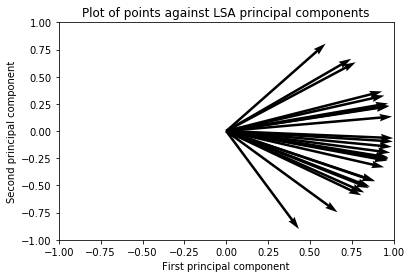

In [11]:
# Plot scatter plot of points with vectors %pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()

In [12]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=categories, columns=categories)

,Culture_20,Nature_20,Concepts_20,History_20,Technology_20,Arts_20,Entertainment_20,Business_20,Society_20,Life_20,...,Events_20,Health_20,Education_20,Philosophy_20,Humanities_20,World_20,Mathematics_20,Sports_20,Politics_20,Geography_20
Culture_20,1.000000,0.740381,0.871148,0.891311,0.861347,0.778584,0.997124,0.700446,0.827648,0.630430,...,0.453293,0.691316,0.999647,0.992443,0.909358,0.654420,0.866262,0.948788,0.870432,0.742941
Nature_20,0.740381,1.000000,0.975039,0.355146,0.979208,0.154624,0.687313,0.998341,0.990038,0.988541,...,0.934772,0.997528,0.757974,0.817266,0.393632,0.992782,0.977182,0.914818,0.975361,0.999993
Concepts_20,0.871148,0.975039,1.000000,0.553840,0.999808,0.370127,0.831433,0.960636,0.996588,0.930350,...,0.832562,0.957027,0.883883,0.924815,0.587915,0.941373,0.999951,0.981655,0.999999,0.975879
History_20,0.891311,0.355146,0.553840,1.000000,0.537397,0.978482,0.923107,0.300727,0.483228,0.209966,...,-0.000111,0.288578,0.878954,0.828943,0.999139,0.240469,0.545599,0.702432,0.552627,0.358711
Technology_20,0.861347,0.979208,0.999808,0.537397,1.000000,0.351829,0.820371,0.965902,0.998016,0.937365,...,0.843270,0.962532,0.874537,0.917173,0.571930,0.947811,0.999952,0.977725,0.999835,0.979975
Arts_20,0.778584,0.154624,0.370127,0.978482,0.351829,1.000000,0.823901,0.097477,0.292189,0.003717,...,-0.206439,0.084817,0.761641,0.695699,0.969077,0.035019,0.360945,0.540462,0.368774,0.158393
Entertainment_20,0.997124,0.687313,0.831433,0.923107,0.820371,0.823901,1.000000,0.644346,0.782736,0.569792,...,0.384441,0.634572,0.994760,0.980291,0.938269,0.595238,0.825911,0.922119,0.830623,0.690080
Business_20,0.700446,0.998341,0.960636,0.300727,0.965902,0.097477,0.644346,1.000000,0.980288,0.995593,...,0.953677,0.999919,0.719156,0.782727,0.340045,0.998041,0.963330,0.890044,0.961039,0.998114
Society_20,0.827648,0.990038,0.996588,0.483228,0.998016,0.292189,0.782736,0.980288,1.000000,0.957440,...,0.875441,0.977697,0.842264,0.890261,0.519142,0.966006,0.997354,0.962569,0.996707,0.990568
Life_20,0.630430,0.988541,0.930350,0.209966,0.937365,0.003717,0.569792,0.995593,0.957440,1.000000,...,0.977686,0.996705,0.650826,0.720914,0.250357,0.999510,0.933922,0.843371,0.930883,0.987958
